In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew

import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv("../input/tabular-playground-series-mar-2021/train.csv")
train.shape

#train=train.sample(frac=0.1)
#train.reset_index(drop=True,inplace=True)

(300000, 32)

In [3]:
from sklearn.model_selection import KFold,StratifiedKFold
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
train["fold"]=-1
for i,(t,v) in enumerate(kf.split(train.sample(frac=1.),train.target)):
    train.loc[v,"fold"]=i 
test=train.copy()
train=train[train.fold!=4]
test=test[test.fold==4]

train=train.drop(["fold"],axis=1)
test=test.drop(["fold"],axis=1)

train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

In [4]:
train["fold"]=-1
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=5)
for i,(t,v) in enumerate(kf.split(train.sample(frac=1.),train.target)):
    train.loc[v,"fold"]=i 

In [5]:
train_ID=train['id']
test_ID=test['id']

del train["id"]
del test["id"]

# data processing

In [6]:
train.shape[0]

240000

In [7]:
all_data=pd.concat([train,test],axis=0)

In [8]:
all_data

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target,fold
0,A,I,A,B,B,BI,A,S,Q,A,...,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0,0.0
1,A,K,A,A,E,BI,A,E,BM,L,...,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0,2.0
2,A,K,A,C,E,BI,A,Y,AD,F,...,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0,3.0
3,A,I,G,B,E,BI,C,G,Q,A,...,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1,1.0
4,A,I,C,A,E,BI,C,AV,Y,C,...,0.580085,0.301498,0.261055,0.193988,0.935688,0.685868,0.277694,0.428115,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,A,I,A,A,F,BI,C,AN,AX,A,...,0.829591,0.243513,0.309584,0.483159,0.817537,0.459463,0.710156,0.798888,1,NaN
59996,B,K,A,B,F,BI,C,E,BM,J,...,0.218981,0.810718,0.620865,0.581846,0.326457,0.342476,0.329097,0.313593,0,NaN
59997,A,K,A,A,E,BI,C,E,AE,C,...,0.610683,0.780754,0.740786,0.545878,0.397520,0.293546,0.281999,0.398055,1,NaN
59998,A,I,D,A,E,BI,C,AK,BM,A,...,0.591520,0.703695,0.554747,0.549423,0.289943,0.370491,0.345899,0.340204,0,NaN


In [9]:
sel_cat=[col for col in train.columns if "cat" in col]
sel_cont=[col for col in train.columns if "cont" in col]

In [10]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for col in sel_cat:
    all_data[col]=le.fit_transform(all_data[col])

In [11]:
train=all_data[:train.shape[0]]
test=all_data[train.shape[0]:]

In [12]:
sel_col=np.concatenate([sel_cat,sel_cont],axis=0)
sel_tar=["target"]

In [13]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
d1=ss.fit_transform(train[sel_cont].values)
train2=train.copy()
train2[sel_cont]=d1

In [14]:
#f,ax=plt.subplots(11,2,figsize=(14,24))
#for i in range(11):
#    sns.distplot(train[sel_cont[i]],ax=ax[i][0])
#    sns.distplot(train2[sel_cont[i]],ax=ax[i][1])    

# feature engineering

<AxesSubplot:>

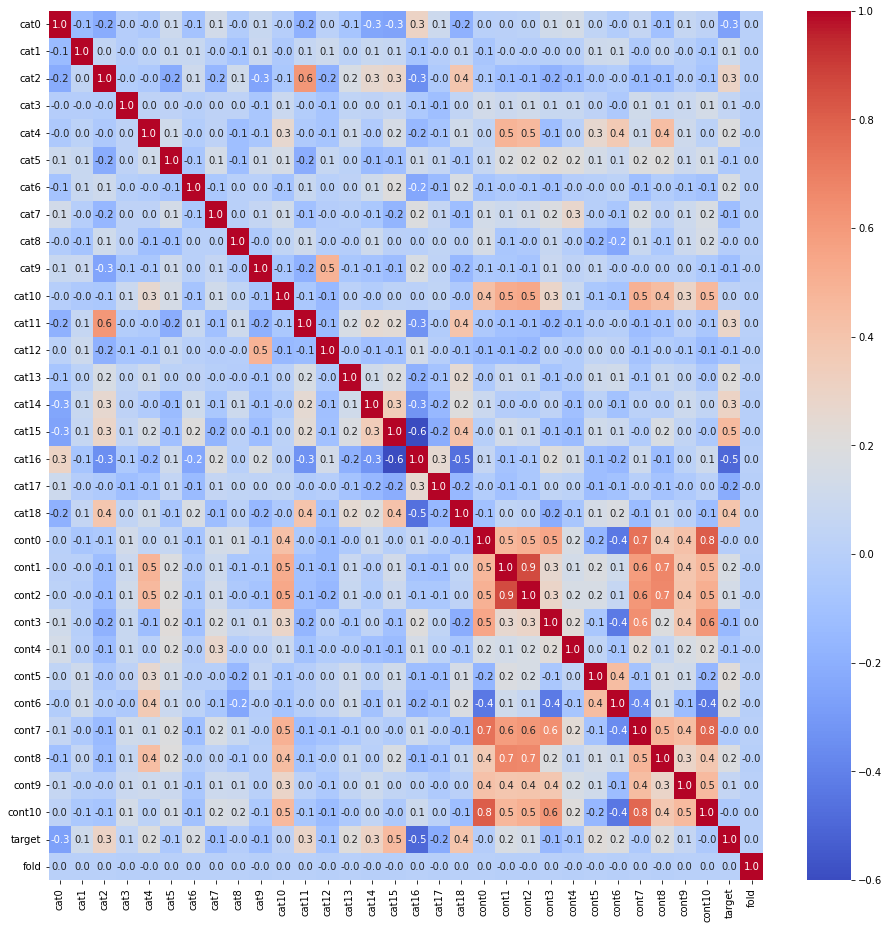

In [15]:
#corr
corr=train.corr()
plt.subplots(figsize=(16,16))
sns.heatmap(corr,annot=True, fmt='.1f',cmap="coolwarm")

In [16]:
all_data.isnull().sum()/all_data.shape[0]

cat0      0.0
cat1      0.0
cat2      0.0
cat3      0.0
cat4      0.0
cat5      0.0
cat6      0.0
cat7      0.0
cat8      0.0
cat9      0.0
cat10     0.0
cat11     0.0
cat12     0.0
cat13     0.0
cat14     0.0
cat15     0.0
cat16     0.0
cat17     0.0
cat18     0.0
cont0     0.0
cont1     0.0
cont2     0.0
cont3     0.0
cont4     0.0
cont5     0.0
cont6     0.0
cont7     0.0
cont8     0.0
cont9     0.0
cont10    0.0
target    0.0
fold      0.2
dtype: float64

In [17]:
X=train[sel_col].values
X2=train2[sel_col].values
y=train.target

# Model

In [18]:
!pip install pytorch_tabnet

In [19]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

import xgboost as xgb
import lightgbm as lgbm
import catboost as catb
from pytorch_tabnet.tab_model import TabNetRegressor,TabNetClassifier
import torch.optim as optim

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold,train_test_split
from sklearn.metrics import mean_squared_error,roc_auc_score
import datetime

In [20]:
sel_col=np.concatenate([sel_cat,sel_cont],axis=0)
sel_tar="target"

cv_results_all=[]
test_results_all=[]
cv_algorithms=[]


NN=True
XGB=True
TABNET=True
CV=False
LGBM=True
CATB=True

In [21]:
sel_col,sel_tar

(array(['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
        'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14',
        'cat15', 'cat16', 'cat17', 'cat18', 'cont0', 'cont1', 'cont2',
        'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9',
        'cont10'], dtype='<U6'),
 'target')

# tabnet

In [22]:
tabnet_params = dict(
    n_d = 32,
    n_a = 32,
    n_steps = 1,
    gamma = 1.3,
    lambda_sparse = 0,
    optimizer_fn = optim.Adam,
    optimizer_params = dict(lr = 2e-2, weight_decay = 1e-5),
    mask_type = "sparsemax",
    scheduler_params = dict(
        mode = "max", patience = 5, min_lr = 1e-5, factor = 0.9),
    scheduler_fn = optim.lr_scheduler.ReduceLROnPlateau,
    seed = 42,
    verbose = 50,
    device_name="cuda",
)

In [23]:
if TABNET:
    TABNET_model=[]
    cv_result=[]
    for fold in range(5):
        print(datetime.datetime.now().strftime("%H:%M:%S"))

        train_df=train[train.fold!=fold].reset_index(drop=True)
        valid_df=train[train.fold==fold].reset_index(drop=True)

        x_train=train_df[sel_col].to_numpy()
        x_valid=valid_df[sel_col].to_numpy()
        y_train=train_df[sel_tar].to_numpy()
        y_valid=valid_df[sel_tar].to_numpy()

        TABNETR=TabNetClassifier(**tabnet_params)
        TABNETR.fit(X_train=x_train, y_train=y_train,
                      eval_set=[(x_valid, y_valid)],
                      patience=30,max_epochs = 200,
                      batch_size=8192,
                      eval_metric=["auc"],
                   )
        ret = TABNETR.predict(x_valid)
        cv_result.append(roc_auc_score(ret,y_valid))
        TABNET_model.append(TABNETR)

    print(datetime.datetime.now().strftime("%H:%M:%S"))
    cv_results_all.append(cv_result)
    cv_algorithms.append("TABNET_Optuna")

06:43:12
Device used : cuda
epoch 0  | loss: 0.46544 | val_0_auc: 0.76637 |  0:00:04s

Early stopping occurred at epoch 46 with best_epoch = 16 and best_val_0_auc = 0.87854
Best weights from best epoch are automatically used!
06:46:02
Device used : cuda
epoch 0  | loss: 0.46605 | val_0_auc: 0.75257 |  0:00:03s
epoch 50 | loss: 0.33923 | val_0_auc: 0.87135 |  0:02:43s

Early stopping occurred at epoch 52 with best_epoch = 22 and best_val_0_auc = 0.87729
Best weights from best epoch are automatically used!
06:48:55
Device used : cuda
epoch 0  | loss: 0.46693 | val_0_auc: 0.7164  |  0:00:03s
epoch 50 | loss: 0.3349  | val_0_auc: 0.87168 |  0:02:40s

Early stopping occurred at epoch 52 with best_epoch = 22 and best_val_0_auc = 0.87858
Best weights from best epoch are automatically used!
06:51:45
Device used : cuda
epoch 0  | loss: 0.46352 | val_0_auc: 0.79825 |  0:00:03s
epoch 50 | loss: 0.33778 | val_0_auc: 0.86784 |  0:02:41s

Early stopping occurred at epoch 51 with best_epoch = 21 and 

In [24]:
test[sel_col].to_numpy()

array([[ 0.        ,  8.        ,  0.        , ...,  0.39935257,
         0.92740583,  0.49372922],
       [ 0.        ,  5.        ,  0.        , ...,  0.92720394,
         0.60575467,  0.45415488],
       [ 0.        , 11.        , 14.        , ...,  0.30210288,
         0.35657193,  0.4024228 ],
       ...,
       [ 0.        , 10.        ,  0.        , ...,  0.29354617,
         0.28199884,  0.39805546],
       [ 0.        ,  8.        ,  3.        , ...,  0.37049133,
         0.3458991 ,  0.34020434],
       [ 0.        ,  5.        ,  0.        , ...,  0.3626019 ,
         0.32400707,  0.45023248]])

In [26]:
if TABNET:
    p_all=[]
    for i in range(5):
        print(datetime.datetime.now().strftime("%H:%M:%S"))
        p_all.append(TABNET_model[i].predict_proba(test[sel_col].to_numpy())[:,-1])
    print(datetime.datetime.now().strftime("%H:%M:%S"))
    preds=np.mean(p_all,axis=0)
    ret=roc_auc_score(test.target,preds)
    print("tabnet",ret)
    test_results_all.append(ret)

07:09:37
07:09:37
07:09:37
07:09:38
07:09:38
07:09:39
tabnet 0.8839528082232075


# XGB

In [27]:
# google search
Best_trial={
    "gpu_id":0,
    "tree_method":"gpu_hist",
    "learning_rate":0.01,
    "n_estimators":10000,
    "max_depth":4,
    "min_child_weight":0,
    "gamma":0.6,
    "subsample":0.7,
    "colsample_bytree":0.7,
    "nthread":-1,
    "scale_pos_weight":1,
    "seed":27,
    "reg_alpha":0.00006,
    "random_state":42,
    }   

In [28]:
if XGB:
    XGB_model=[]
    cv_result=[]
    for fold in range(5):
        print(datetime.datetime.now().strftime("%H:%M:%S"))

        train_df=train[train.fold!=fold].reset_index(drop=True)
        valid_df=train[train.fold==fold].reset_index(drop=True)

        x_train=train_df[sel_col].to_numpy()
        x_valid=valid_df[sel_col].to_numpy()
        y_train=train_df[sel_tar].to_numpy()
        y_valid=valid_df[sel_tar].to_numpy()

        XGBR=xgb.XGBClassifier(**Best_trial)
        XGBR.fit(X=x_train, y=y_train,
                      eval_set=[(x_valid, y_valid)],
                       early_stopping_rounds=1000,verbose=1000,
                      eval_metric=['auc'])
        ret = XGBR.predict(x_valid)
        cv_result.append(roc_auc_score(ret,y_valid))
        XGB_model.append(XGBR)

    print(datetime.datetime.now().strftime("%H:%M:%S"))
    cv_results_all.append(cv_result)
    cv_algorithms.append("XGB_Optuna")

07:09:41
[0]	validation_0-auc:0.83870
[1000]	validation_0-auc:0.88408
[2000]	validation_0-auc:0.88791
[3000]	validation_0-auc:0.88974
[4000]	validation_0-auc:0.89085
[5000]	validation_0-auc:0.89145
[6000]	validation_0-auc:0.89189
[7000]	validation_0-auc:0.89220
[8000]	validation_0-auc:0.89244
[9000]	validation_0-auc:0.89254
[9999]	validation_0-auc:0.89253
07:10:18
[0]	validation_0-auc:0.83662
[1000]	validation_0-auc:0.88285
[2000]	validation_0-auc:0.88662
[3000]	validation_0-auc:0.88837
[4000]	validation_0-auc:0.88940
[5000]	validation_0-auc:0.89002
[6000]	validation_0-auc:0.89043
[7000]	validation_0-auc:0.89066
[8000]	validation_0-auc:0.89080
[9000]	validation_0-auc:0.89091
[9999]	validation_0-auc:0.89095
07:10:54
[0]	validation_0-auc:0.83733
[1000]	validation_0-auc:0.88554
[2000]	validation_0-auc:0.88980
[3000]	validation_0-auc:0.89158
[4000]	validation_0-auc:0.89257
[5000]	validation_0-auc:0.89318
[6000]	validation_0-auc:0.89361
[7000]	validation_0-auc:0.89386
[8000]	validation_0-au

In [29]:
if XGB:
    p_all=[]
    for i in range(5):
        p_all.append(XGB_model[i].predict_proba(test[sel_col].to_numpy())[:,-1])
    
    preds=np.mean(p_all,axis=0)
    ret=roc_auc_score(test.target,preds)
    print("XGB_Optuna",ret)
    test_results_all.append(ret)    

XGB_Optuna 0.8951734509943459


# LGBM

In [30]:
Best_trial2={
    'device':"gpu",
    'n_estimators':10000,
#     'num_leaves': 491,
#     'min_child_weight': 0.03,
#     'feature_fraction': 0.3,
#     'bagging_fraction': 0.4,
#     'min_data_in_leaf': 106,
#     'objective': 'binary',
#     'max_depth': -1,
#     'learning_rate': 0.01,
#     "boosting_type": "gbdt",
#     "bagging_seed": 11,
#     "metric": 'binary_logloss',
#     "verbosity": 0,
#     'reg_alpha': 0.4,
#     'reg_lambda': 0.6,
#     'random_state': 47
}

In [31]:
if LGBM:
    LGBM_model=[]
    cv_result=[]
    for fold in range(5):
        print(datetime.datetime.now().strftime("%H:%M:%S"))

        train_df=train[train.fold!=fold].reset_index(drop=True)
        valid_df=train[train.fold==fold].reset_index(drop=True)

        x_train=train_df[sel_col].to_numpy()
        x_valid=valid_df[sel_col].to_numpy()
        y_train=train_df[sel_tar].to_numpy()
        y_valid=valid_df[sel_tar].to_numpy()

        LGBMR=lgbm.LGBMClassifier(**Best_trial2)
        LGBMR.fit(X=x_train, y=y_train,
                 eval_set=[(x_valid, y_valid)],
                 early_stopping_rounds=1000,verbose=500,
                 eval_metric=['auc'])
        ret = LGBMR.predict(x_valid)
        cv_result.append(roc_auc_score(ret,y_valid))
        LGBM_model.append(LGBMR)

    print(datetime.datetime.now().strftime("%H:%M:%S"))
    cv_results_all.append(cv_result)
    cv_algorithms.append("LGBM_Optuna")

07:13:16
[500]	valid_0's auc: 0.890541	valid_0's binary_logloss: 0.350291
[1000]	valid_0's auc: 0.88991	valid_0's binary_logloss: 0.351399
[1500]	valid_0's auc: 0.888769	valid_0's binary_logloss: 0.353877
07:13:58
[500]	valid_0's auc: 0.888672	valid_0's binary_logloss: 0.352765
[1000]	valid_0's auc: 0.887506	valid_0's binary_logloss: 0.354853
07:14:30
[500]	valid_0's auc: 0.891376	valid_0's binary_logloss: 0.349319
[1000]	valid_0's auc: 0.890628	valid_0's binary_logloss: 0.350698
07:15:00
[500]	valid_0's auc: 0.887429	valid_0's binary_logloss: 0.355189
[1000]	valid_0's auc: 0.886459	valid_0's binary_logloss: 0.357088
07:15:29
[500]	valid_0's auc: 0.88965	valid_0's binary_logloss: 0.352037
[1000]	valid_0's auc: 0.888563	valid_0's binary_logloss: 0.353608
07:15:59


In [32]:
if LGBM:
    p_all=[]
    for i in range(5):
        p_all.append(LGBM_model[i].predict_proba(test[sel_col].to_numpy())[:,-1])
    
    preds=np.mean(p_all,axis=0)
    ret=roc_auc_score(test.target,preds)
    print("LGBM_Optuna",ret)
    test_results_all.append(ret)   

LGBM_Optuna 0.8936525874723596


# Catboost

In [33]:
Best_trial3={
#     'task_type':"gpu",
    'iterations':10000,
    'eval_metric':"AUC",

#     'eval_metric':['rmse'],
#     'num_leaves': 491,
#     'min_child_weight': 0.03,
#     'feature_fraction': 0.3,
#     'bagging_fraction': 0.4,
#     'min_data_in_leaf': 106,
#     'objective': 'binary',
#     'max_depth': -1,
#     'learning_rate': 0.01,
#     "boosting_type": "gbdt",
#     "bagging_seed": 11,
#     "metric": 'binary_logloss',
#     "verbosity": 0,
#     'reg_alpha': 0.4,
#     'reg_lambda': 0.6,
#     'random_state': 47
}

In [34]:
if CATB:
    CATB_model=[]
    cv_result=[]
    for fold in range(5):
        print(datetime.datetime.now().strftime("%H:%M:%S"))

        train_df=train[train.fold!=fold].reset_index(drop=True)
        valid_df=train[train.fold==fold].reset_index(drop=True)

        x_train=train_df[sel_col].to_numpy()
        x_valid=valid_df[sel_col].to_numpy()
        y_train=train_df[sel_tar].to_numpy()
        y_valid=valid_df[sel_tar].to_numpy()

        CATBR=catb.CatBoostClassifier(**Best_trial3)
        CATBR.fit(X=x_train, y=y_train,
                 eval_set=[(x_valid, y_valid)],
                 early_stopping_rounds=1000,verbose=1000)
        ret = CATBR.predict(x_valid)
        cv_result.append(roc_auc_score(ret,y_valid))
        CATB_model.append(CATBR)

    print(datetime.datetime.now().strftime("%H:%M:%S"))
    cv_results_all.append(cv_result)
    cv_algorithms.append("CATB_Optuna")

07:16:06
Learning rate set to 0.042647
0:	test: 0.8419805	best: 0.8419805 (0)	total: 109ms	remaining: 18m 14s
1000:	test: 0.8903212	best: 0.8903212 (1000)	total: 54.2s	remaining: 8m 7s
2000:	test: 0.8916681	best: 0.8916681 (2000)	total: 1m 46s	remaining: 7m 4s
3000:	test: 0.8919042	best: 0.8919290 (2979)	total: 2m 38s	remaining: 6m 10s
4000:	test: 0.8918761	best: 0.8919536 (3282)	total: 3m 31s	remaining: 5m 17s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.8919536387
bestIteration = 3282

Shrink model to first 3283 iterations.
07:19:54
Learning rate set to 0.042647
0:	test: 0.8484420	best: 0.8484420 (0)	total: 55.2ms	remaining: 9m 11s
1000:	test: 0.8886546	best: 0.8886547 (999)	total: 54s	remaining: 8m 5s
2000:	test: 0.8901846	best: 0.8901992 (1957)	total: 1m 45s	remaining: 7m 2s
3000:	test: 0.8906010	best: 0.8906086 (2981)	total: 2m 38s	remaining: 6m 9s
4000:	test: 0.8907010	best: 0.8907713 (3456)	total: 3m 31s	remaining: 5m 17s
Stopped by overfitting detector 

In [35]:
if CATB:
    p_all=[]
    for i in range(5):
        p_all.append(CATB_model[i].predict_proba(test[sel_col].to_numpy())[:,-1])
    
    preds=np.mean(p_all,axis=0)
    ret=roc_auc_score(test.target,preds)
    print("CATB_Optuna",ret)
    test_results_all.append(ret)    

CATB_Optuna 0.895515303414401


# Gradient Boosting

In [36]:
GB=True
if GB:
    GB_model=[]
    cv_result=[]
    for fold in range(5):
        print(datetime.datetime.now().strftime("%H:%M:%S"))

        train_df=train[train.fold!=fold].reset_index(drop=True)
        valid_df=train[train.fold==fold].reset_index(drop=True)

        x_train=train_df[sel_col].to_numpy()
        x_valid=valid_df[sel_col].to_numpy()
        y_train=train_df[sel_tar].to_numpy()
        y_valid=valid_df[sel_tar].to_numpy()

        GBR=GradientBoostingClassifier()
        GBR.fit(X=x_train, y=y_train)
        ret = GBR.predict(x_valid)
        cv_result.append(roc_auc_score(ret,y_valid))
        GB_model.append(GBR)

    print(datetime.datetime.now().strftime("%H:%M:%S"))
    cv_results_all.append(cv_result)
    cv_algorithms.append("GB")

07:34:38
07:36:24
07:38:10
07:39:56
07:41:42
07:43:28


In [37]:
if GB:
    p_all=[]
    for i in range(5):
        p_all.append(GB_model[i].predict_proba(test[sel_col].to_numpy())[:,-1])
    
    preds=np.mean(p_all,axis=0)
    ret=roc_auc_score(test.target,preds)
    print("GB",ret)
    test_results_all.append(ret)    

GB 0.8825304978169446


# NN

In [38]:
import torch
import torch.nn as nn

In [39]:
##Dataset
import torch
import torch.nn as nn

class TDataset:
    def __init__(self,dataset,features):
        self.dataset=dataset
        self.feature=features
    def __len__(self):
        return self.dataset.shape[0]

    def __getitem__(self,item):
        return {
            "x":torch.tensor(self.dataset[item,:],dtype=torch.float),
            "y":torch.tensor(self.feature[item,:],dtype=torch.float)
        }

In [40]:
##Dataset
import torch
import torch.nn as nn

class TDataset:
    def __init__(self,dataset,features):
        self.dataset=dataset
        self.feature=features
    def __len__(self):
        return self.dataset.shape[0]

    def __getitem__(self,item):
        return {
            "x":torch.tensor(self.dataset[item,:],dtype=torch.float),
            "y":torch.tensor(self.feature[item,:],dtype=torch.float)
        }

In [41]:
## Model
class TModel(nn.Module):
    def __init__(self,num_features,num_targets,num_layers,hidden_size,dropout):
        super().__init__()
        layers=[]
        for _ in range(num_layers):
            if len(layers)==0:
                layers.append(nn.Linear(num_features,hidden_size))
                layers.append(nn.BatchNorm1d(hidden_size))
                layers.append(nn.Dropout(dropout))
                layers.append(nn.ReLU())
            else:
                layers.append(nn.Linear(hidden_size,hidden_size))
                layers.append(nn.BatchNorm1d(hidden_size))
                layers.append(nn.Dropout(dropout))
                layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_size,num_targets))

        self.model=nn.Sequential(*layers)

    def forward(self,x):
        x=self.model(x)
        return x

In [42]:
class Engine:
    def __init__(self,model,optimizer,device):
        self.model=model
        self.optimizer=optimizer
        self.device=device   
    
    def loss_fn(self,targets,outputs):
        return nn.BCEWithLogitsLoss()(outputs,targets)
    
    def train(self,data_loader):
        self.model.train()
        final_loss=0
        for data in data_loader:
            self.optimizer.zero_grad()
            inputs=data["x"].to(self.device)
            targets=data["y"].to(self.device)
            outputs=self.model(inputs)
            loss=self.loss_fn(targets,outputs)
            loss.backward()
            self.optimizer.step()
            final_loss += loss.item()
        return final_loss/len(data_loader)
    
    def validate(self,data_loader):
        self.model.eval()
        final_loss=0
        for data in data_loader:
            inputs=data["x"].to(self.device)
            targets=data["y"].to(self.device)
            outputs=self.model(inputs)
            loss=self.loss_fn(targets,outputs)
            final_loss += loss.item()
        return final_loss/len(data_loader)
    
    def predict(self,data_loader):
        self.model.eval()
        final_predictions = []
        for data in data_loader:
            inputs=data["x"].to(self.device)
            predictions = self.model(inputs)
            predictions = predictions.cpu()
            final_predictions.append(predictions.detach().numpy())
        return final_predictions

In [43]:
def train_fold(fold,df,sel_cos,sel_tar,save_model=False):

    # Dataset
    train_df=df[df.fold!=fold].reset_index(drop=True)
    valid_df=df[df.fold==fold].reset_index(drop=True)

    x_train=train_df[sel_cos].to_numpy()
    x_valid=valid_df[sel_cos].to_numpy()
    y_train=train_df[sel_tar].to_numpy().reshape(-1,1)
    y_valid=valid_df[sel_tar].to_numpy().reshape(-1,1)

    # DataLoader
    train_dataset=TDataset(x_train,y_train)
    train_loader=torch.utils.data.DataLoader(
        train_dataset,batch_size=1024,num_workers=8,shuffle=True
    )
    valid_dataset=TDataset(x_valid,y_valid)
    valid_loader=torch.utils.data.DataLoader(
        valid_dataset,batch_size=1024,num_workers=8,shuffle=False
    )
    
    # Model,Optimizer, scheduler, engine
    model=TModel(
        num_features=x_train.shape[1],
        num_targets=1,#y_train.shape[1],
        num_layers=5,
        hidden_size=2048,
        dropout=0.3        
    )
    
    device="cuda" if torch.cuda.is_available() else "cpu"
    print(device,f"inputs:{x_train.shape[1]}, targets:{1}")
    model.to(device)
    optimizer=torch.optim.Adam(model.parameters(),lr=3e-4)
    scheduler=torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,patience=3,threshold=1e-5,mode="max",verbose=True
    )

    engine=Engine(model,optimizer,device)
    best_loss=np.inf
    early_stopping=10
    early_stopping_cnt=0
    EPOCH=300
    for epoch in range(EPOCH):
        train_loss=engine.train(train_loader)
        valid_loss=engine.validate(valid_loader)
        scheduler.step(valid_loss)

        if valid_loss<best_loss:
            best_loss=valid_loss
            torch.save(model.state_dict(),f"model_fold_{fold}.bin")
            print(f"fold={fold}, epoch={epoch}, train_loss={train_loss:.6f}, valid_loss={valid_loss:.6f}")    
            early_stopping_cnt=0
        else:
            early_stopping_cnt+=1
        if early_stopping_cnt>early_stopping:
            break

    print(f"fold={fold}, best val loss={best_loss}")
    return best_loss

In [44]:
def predict_fold(fold,df,sel_col,sel_tar):
    x_test=df[sel_col].to_numpy()
    y_test=np.zeros((df.shape[0],1))
    test_dataset=TDataset(x_test,y_test)
    test_loader=torch.utils.data.DataLoader(
        test_dataset,batch_size=1024,num_workers=8,shuffle=False
    )
    

    device="cuda" if torch.cuda.is_available() else "cpu"
    model=TModel(
        num_features=x_test.shape[1],
        num_targets=1,#y_test.shape[1],
        num_layers=5,
        hidden_size=2048,
        dropout=0.3        
    )
    
    device="cuda" if torch.cuda.is_available() else "cpu"
    print(device,f"inputs:{x_test.shape[1]}, targets:{1}")

    model_save_path=f"./model_fold_{fold}.bin"
    model.load_state_dict(torch.load(model_save_path))
    model=model.to(device)
    
    engine=Engine(model,None,device)
    preds=engine.predict(test_loader)
    preds=np.vstack(preds)
    return preds

In [45]:
cv_results=[]
if NN:
    for i in range(5):
        print(datetime.datetime.now().strftime("%H:%M:%S"))
        cv_results.append(train_fold(i,train,sel_col,sel_tar,True))
    
    print(datetime.datetime.now().strftime("%H:%M:%S"))
    cv_results_all.append(cv_results)
    cv_algorithms.append("NN")

07:43:28
cuda inputs:30, targets:1
fold=0, epoch=0, train_loss=0.455791, valid_loss=0.400163
fold=0, epoch=1, train_loss=0.403361, valid_loss=0.388976
fold=0, epoch=2, train_loss=0.391721, valid_loss=0.381220
fold=0, epoch=3, train_loss=0.385260, valid_loss=0.378500
Epoch 00005: reducing learning rate of group 0 to 3.0000e-05.
fold=0, epoch=5, train_loss=0.378150, valid_loss=0.371759
fold=0, epoch=6, train_loss=0.377279, valid_loss=0.371533
Epoch 00009: reducing learning rate of group 0 to 3.0000e-06.
fold=0, epoch=8, train_loss=0.376546, valid_loss=0.371070
fold=0, epoch=9, train_loss=0.376174, valid_loss=0.370971
fold=0, epoch=10, train_loss=0.376422, valid_loss=0.370921
Epoch 00013: reducing learning rate of group 0 to 3.0000e-07.
fold=0, epoch=12, train_loss=0.376049, valid_loss=0.370917
fold=0, epoch=14, train_loss=0.376244, valid_loss=0.370894
fold=0, epoch=15, train_loss=0.375928, valid_loss=0.370887
Epoch 00017: reducing learning rate of group 0 to 3.0000e-08.
fold=0, epoch=18,

In [46]:
if NN:
    p_all=[]
    for i in range(5):
        print(datetime.datetime.now().strftime("%H:%M:%S"))
        ret=p_all.append(predict_fold(i,test,sel_col,sel_tar))
    print(datetime.datetime.now().strftime("%H:%M:%S"))
    preds=np.mean(p_all,axis=0)
    ret=roc_auc_score(test.target,preds)
    print("NN",ret)
    test_results_all.append(ret)   

08:04:14
cuda inputs:30, targets:1
08:04:16
cuda inputs:30, targets:1
08:04:18
cuda inputs:30, targets:1
08:04:20
cuda inputs:30, targets:1
08:04:22
cuda inputs:30, targets:1
08:04:24
NN 0.878140640898194


In [47]:
df=pd.DataFrame({"algorithms":cv_algorithms,"test_ret":test_results_all, "cv_ret":np.mean(cv_results_all,axis=1)})
df

,algorithms,test_ret,cv_ret
0,TABNET_Optuna,0.883953,0.808597
1,XGB_Optuna,0.895173,0.818936
2,LGBM_Optuna,0.893653,0.816317
3,CATB_Optuna,0.895515,0.819085
4,GB,0.882530,0.810956
5,NN,0.878141,0.371033
